<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-6/blob/main/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [103]:
!pip install semtorch

     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 29.2MB 103kB/s 
  Created wheel for semtorch: filename=SemTorch-0.1.1-cp37-none-any.whl size=50551 sha256=713ec5c0d6ad14c26876cd0768048e611aba222f3a7be07508b8cd03dfe78498
  Stored in directory: /root/.cache/pip/wheels/f6/da/9f/726f9d2f054d71afa59afeca3f4672464001e9e3f2924d959e
Successfully built semtorch
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 10.5MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [1]:
from fastai.basics import *
from fastai.vision import models
from fastai.vision.all import *
from fastai.metrics import *
from fastai.data.all import *
from fastai.callback import *


from pathlib import Path
import random
from semtorch import get_segmentation_learner

# Dataset

In [3]:
!wget https://www.dropbox.com/s/lsfdcp4vpz7s8u8/dataset_prueba.zip?dl=0 -O dataset.zip

--2021-05-20 13:30:38--  https://www.dropbox.com/s/lsfdcp4vpz7s8u8/dataset_prueba.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lsfdcp4vpz7s8u8/dataset_prueba.zip [following]
--2021-05-20 13:30:38--  https://www.dropbox.com/s/raw/lsfdcp4vpz7s8u8/dataset_prueba.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc585b752cf3af6be305d726ae75.dl.dropboxusercontent.com/cd/0/inline/BO1nnQqViGCL9AV01NsoBCypo9YJl774ct-L7XZBs5VPNyVsYkhcTKhZAarPTHSj5Yrtk6j-vkJsJ5hvfWjExqWeFRCJkUSA4K_W3X-ffNULxe1jiWdGZTSvUbuUeemecVkjqc8WQeELMGZ1BIwagEQV/file# [following]
--2021-05-20 13:30:38--  https://uc585b752cf3af6be305d726ae75.dl.dropboxusercontent.com/cd/0/inline/BO1nnQqViGCL9AV01NsoBCypo9YJl774ct-L7XZBs5VPNyVsYkhcTKhZAarPTHSj

In [4]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset_prueba/
  inflating: dataset_prueba/codes.txt  
   creating: dataset_prueba/Images/
   creating: dataset_prueba/Images/test/
  inflating: dataset_prueba/Images/test/22828930_15.tiff  
  inflating: dataset_prueba/Images/test/22828990_15.tiff  
  inflating: dataset_prueba/Images/test/22829050_15.tiff  
   creating: dataset_prueba/Images/train/
  inflating: dataset_prueba/Images/train/22678915_15.tiff  
  inflating: dataset_prueba/Images/train/22678930_15.tiff  
  inflating: dataset_prueba/Images/train/22678945_15.tiff  
  inflating: dataset_prueba/Images/train/22678960_15.tiff  
  inflating: dataset_prueba/Images/train/22678975_15.tiff  
  inflating: dataset_prueba/Images/train/22678990_15.tiff  
  inflating: dataset_prueba/Images/train/22679005_15.tiff  
  inflating: dataset_prueba/Images/train/22679020_15.tiff  
   creating: dataset_prueba/Images/val/
  inflating: dataset_prueba/Images/val/22978945_15.tiff  
  inflating: dataset_prueba/Images/

In [2]:
path=Path('dataset_prueba/')

In [3]:
path.ls()

(#3) [Path('dataset_prueba/Images'),Path('dataset_prueba/codes.txt'),Path('dataset_prueba/Labels')]

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import os

def recortar_en_trozos(imagen_ruta, altoyancho):
  imagen = cv2.imread(imagen_ruta)
  nombre = imagen_ruta.split('/')[3]
  carpeta2 = imagen_ruta.split('/')[2]
  carpeta1 = imagen_ruta.split('/')[1]
  extension = nombre.split('.')
  ancho = altoyancho
  alto = altoyancho
  i = 0
  for y in range(0,1500,300):
    for x in range(0,1500,300):
      i = i + 1
      recorte = imagen[y:y+altoyancho, x:x+altoyancho]
      cv2.imwrite('dataset_prueba/'+ carpeta1 + '/' + carpeta2 +'/' + extension[0] + '_' + str(i) + '.'+ extension[1], recorte)
  
  os.remove(imagen_ruta)

In [9]:
tam = 300

Images/test

In [10]:
recortar_en_trozos('dataset_prueba/Images/test/22828930_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/test/22828990_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/test/22829050_15.tiff', tam)

Images/train

In [11]:
recortar_en_trozos('dataset_prueba/Images/train/22678915_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678930_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678945_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678960_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678975_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22678990_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22679005_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/train/22679020_15.tiff', tam)

Images/val

In [12]:
recortar_en_trozos('dataset_prueba/Images/val/22978945_15.tiff', tam)
recortar_en_trozos('dataset_prueba/Images/val/23429155_15.tiff', tam)

Labels/test

In [13]:
recortar_en_trozos('dataset_prueba/Labels/test/22828930_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/test/22828990_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/test/22829050_15.tif', tam)

Labels/train

In [14]:
recortar_en_trozos('dataset_prueba/Labels/train/22678915_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678930_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678945_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678960_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678975_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22678990_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22679005_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/train/22679020_15.tif', tam)

Labels/val

In [15]:
recortar_en_trozos('dataset_prueba/Labels/val/22978945_15.tif', tam)
recortar_en_trozos('dataset_prueba/Labels/val/23429155_15.tif', tam)

# Definiciones previas

In [11]:
path_images = path/"Images"
path_labels = path/"Labels"

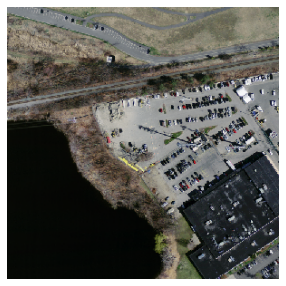

In [12]:
img_1 = path_images/'train/22678915_15_1.tiff'
img = PILImage.create(img_1)
img.show(figsize=(5, 5))

In [13]:
img.size

(300, 300)

In [14]:
test_name = "test"

In [15]:
def get_y_fn (x):
    return Path(str(x).replace("Images","Labels").replace(".tiff",".tif"))

In [16]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

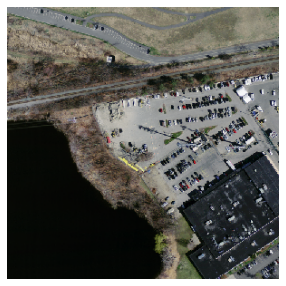

In [17]:
img_f = path_images/'train/22678915_15_1.tiff'
img = PILImage.create(img_f)
img.show(figsize=(5, 5))

In [18]:
img.size

(300, 300)

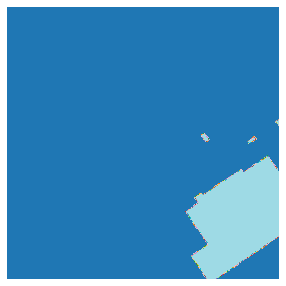

In [19]:
mask = PILMask.create(get_y_fn(img_f))
mask.show(figsize=(5, 5), alpha=1)

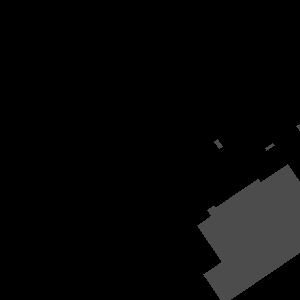

In [20]:
mask

In [21]:
np.unique(mask)

array([ 0, 76], dtype=uint8)

# Partición del dataset

In [22]:
def ParentSplitter(x):
    return Path(x).parent.name==test_name

# Data augmentation

In [23]:
from albumentations import (
    Compose,
    OneOf,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    HorizontalFlip,
    Rotate,
    Transpose,
    CLAHE,
    ShiftScaleRotate
)

class SegmentationAlbumentationsTransform(ItemTransform):
    split_idx = 0
    
    def __init__(self, aug): 
        self.aug = aug
        
    def encodes(self, x):
        img,mask = x
        aug = self.aug(image=np.array(img), mask=np.array(mask))
        return PILImage.create(aug["image"]), PILMask.create(aug["mask"])

In [24]:
transforms=Compose([HorizontalFlip(p=0.5),
                    Rotate(p=0.40,limit=10),GridDistortion()
                    ],p=1)

In [25]:
transformPipeline=SegmentationAlbumentationsTransform(transforms)

In [26]:
class TargetMaskConvertTransform(ItemTransform):
    def __init__(self): 
        pass
    def encodes(self, x):
        img,mask = x
        
        #Convert to array
        mask = np.array(mask)
        
        mask[mask!=76]=0
        # Change 76 for 1
        mask[mask==76]=1
        
        
        # Back to PILMask
        mask = PILMask.create(mask)
        return img, mask

# Dataloader

In [27]:
trainDB = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=partial(get_image_files,folders=['train']),
                   get_y=get_y_fn,
                   splitter=RandomSplitter(valid_pct=0.2),
                   item_tfms=[Resize((300,300)), TargetMaskConvertTransform(), transformPipeline],
                   batch_tfms=Normalize.from_stats(*imagenet_stats)
                  )

In [28]:
testDB = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=partial(get_image_files,folders=['train','test']),
                   get_y=get_y_fn,
                   splitter=FuncSplitter(ParentSplitter),
                   item_tfms=[Resize((300,300))],
                   batch_tfms=Normalize.from_stats(*imagenet_stats)
                  )

In [29]:
bs = 4
trainDLS = trainDB.dataloaders(path_images,bs=bs)
testDLS = testDB.dataloaders(path_images,bs=bs)

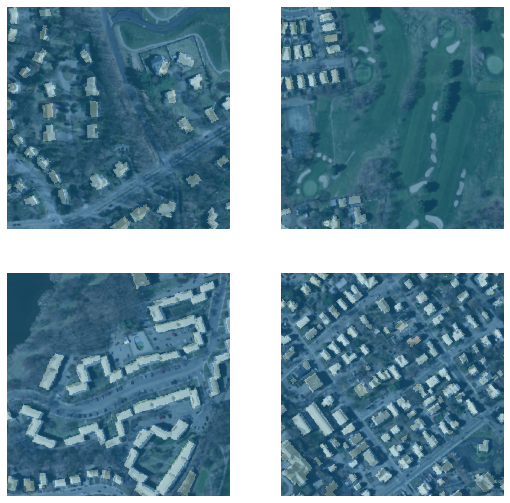

In [30]:
trainDLS.show_batch(vmin=0,vmax=1,figsize=(9, 9))

# Definición de modelo

In [36]:
import torch
torch.cuda.empty_cache()

In [31]:
learn = get_segmentation_learner(dls=trainDLS,number_classes=2,segmentation_type='Semantic Segmentation',
                                 architecture_name='hrnet',backbone_name='hrnet_w30',
                                 metrics=[Dice(),JaccardCoeff()],pretrained=True).to_fp16()

147942KB [00:05, 27977.89KB/s]                            


In [32]:
#learn = unet_learner(trainDLS,resnet18,metrics=[Dice(),JaccardCoeff()]).to_fp16()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


SuggestedLRs(lr_min=0.13182567358016967, lr_steep=0.0003981071640737355)

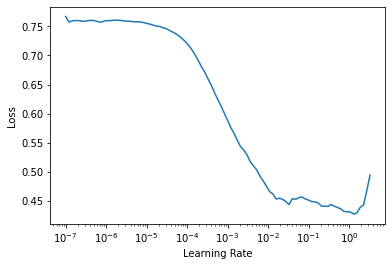

In [33]:
learn.lr_find()

In [35]:
learn.fit_one_cycle(20,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,dice,jaccard_coeff,time
0,0.112695,0.109512,0.730012,0.574818,00:49
1,0.110456,0.103274,0.751986,0.602546,00:49
2,0.108590,0.102970,0.751914,0.602453,00:49
3,0.107956,0.104297,0.748018,0.597467,00:49
4,0.103941,0.104763,0.741646,0.589378,00:49
5,0.102159,0.098808,0.770074,0.626114,00:49
6,0.102816,0.099251,0.769543,0.625413,00:49
7,0.101029,0.098376,0.774663,0.632204,00:49
8,0.100681,0.101942,0.758060,0.610384,00:49
9,0.098360,0.098283,0.774313,0.631738,00:49


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


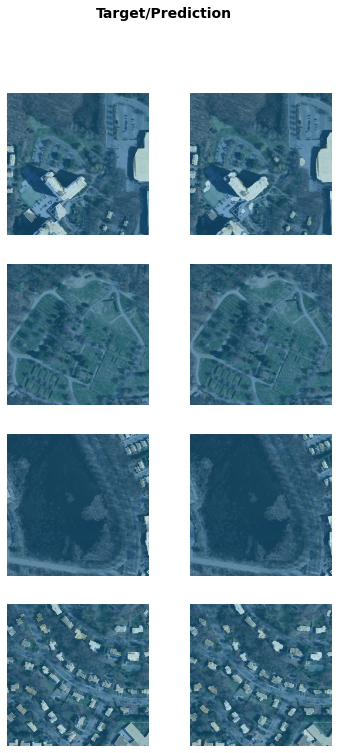

In [36]:
learn.show_results(vmin=0,vmax=1)

In [57]:
aux=learn.model
aux=aux.cpu()

traced_cell=torch.jit.script(aux)
traced_cell.save("hrnet-dataset3-data-augmentation.pth")

In [69]:
learn.save('hrnet')

Path('models/hrnet.pth')

In [41]:
learn.dls = testDLS

In [70]:
fnames = get_image_files(path_images/'test')

In [71]:
dl = learn.dls.test_dl(fnames[:2])

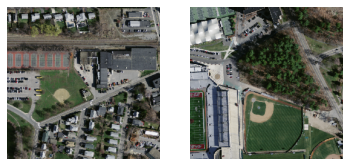

In [72]:
dl.show_batch()

In [73]:
preds = learn.get_preds(dl=dl)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [75]:
preds[0].shape

torch.Size([2, 2, 300, 300])

In [81]:
preds_1 = preds[0][0]

In [82]:
preds_1

TensorImage([[[0.9915, 0.9915, 0.9915,  ..., 0.8318, 0.8216, 0.8216],
         [0.9915, 0.9915, 0.9915,  ..., 0.8318, 0.8216, 0.8216],
         [0.9908, 0.9908, 0.9909,  ..., 0.8165, 0.8030, 0.8030],
         ...,
         [0.9927, 0.9927, 0.9934,  ..., 0.5474, 0.5540, 0.5540],
         [0.9920, 0.9920, 0.9927,  ..., 0.6285, 0.6354, 0.6354],
         [0.9920, 0.9920, 0.9927,  ..., 0.6285, 0.6354, 0.6354]],

        [[0.0085, 0.0085, 0.0085,  ..., 0.1682, 0.1784, 0.1784],
         [0.0085, 0.0085, 0.0085,  ..., 0.1682, 0.1784, 0.1784],
         [0.0092, 0.0092, 0.0091,  ..., 0.1835, 0.1970, 0.1970],
         ...,
         [0.0073, 0.0073, 0.0066,  ..., 0.4526, 0.4460, 0.4460],
         [0.0080, 0.0080, 0.0073,  ..., 0.3715, 0.3646, 0.3646],
         [0.0080, 0.0080, 0.0073,  ..., 0.3715, 0.3646, 0.3646]]])

In [83]:
preds_arx = (preds_1).argmax(dim=0)

In [84]:
np.unique(preds_arx)

array([0, 1])

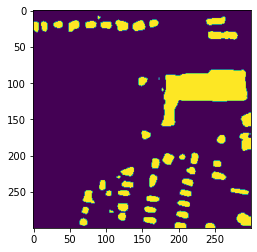

In [85]:
plt.imshow(preds_arx)

Hasta aqui todo perfecto

# Evaluando el modelo

In [ ]:
learn.dls = testDLS

In [ ]:
learn.validate()

# Inferencia

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model = torch.jit.load("unet.pth")
model = model.cpu()
model.eval()

In [ ]:
import PIL

In [ ]:
img = PIL.Image.open('dataset_prueba/Images/test/22828930_15_1.tiff')

In [ ]:
img_muestra = img.copy()
img_muestra.resize((300,300))

In [ ]:
import torchvision.transforms as transforms
def transform_image(image):
    my_transforms = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(
                                            [0.485, 0.456, 0.406],
                                            [0.229, 0.224, 0.225])])
    image_aux = image
    return my_transforms(image_aux).unsqueeze(0).to(device)

In [ ]:
image = transforms.Resize((300,300))(img)
tensor = transform_image(image=image)

In [ ]:
model.to(device)
with torch.no_grad():
    outputs = model(tensor)

#outputs = torch.argmax(outputs,1)

In [ ]:
mask = np.array(outputs.cpu())
mask[mask==1]=76

In [ ]:
mask=np.reshape(mask,(300,300))

In [ ]:
np.unique(mask)

In [ ]:
Image.fromarray(mask.astype('uint8'))

In [ ]:
PIL.Image.open('dataset_prueba/Labels/test/22828930_15_1.tif')